In [17]:
import cv2
import numpy as np
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from skimage.feature import hog

### **Load Dataset**


In [18]:
PATH=r'D:\SEM 8\Computer Vision\Animals' # folder where images are stored

def load_images_and_labels(path):
   images=[]
   labels=[]

   class_names=os.listdir(path)

   for class_index, class_name in enumerate(class_names):
      class_path=os.path.join(path,class_name)
      
      if not os.path.isdir(class_path):
         continue
      for image_name in os.listdir(class_path):
         image_path=os.path.join(class_path,image_name)
         image=cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
         image=cv2.resize(image,(64,64))

         # Feature Extraction
         features=hog(image,orientations=9,pixels_per_cell=(8,8),cells_per_block=(2,2),feature_vector=True)
         images.append(features)
         labels.append(class_index)

   return np.array(images),np.array(labels),class_names

In [19]:
# Load images
x,y,class_names = load_images_and_labels(PATH)

### **Split the dataset**

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

### **Train decision tree classifier**

In [21]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

### **Predict on test data**

In [22]:
y_pred=clf.predict(x_test)


### **Compute Accuracy**

In [26]:
acc=accuracy_score(y_test,y_pred)

print(f'Accuracy:{acc:.2f}')

Accuracy:0.48


### **New Image**

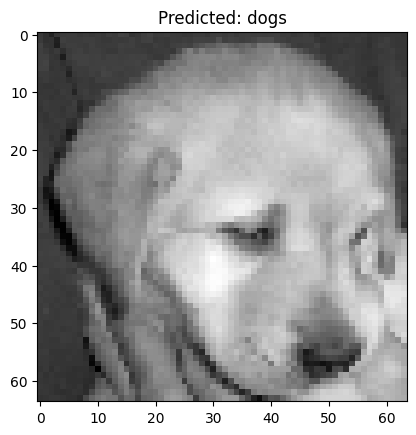

In [29]:
def predict_image(image_path):
    image=cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
    image=cv2.resize(image,(64,64))
    # Feature Extraction using HOG
    features=hog(image,orientations=9,pixels_per_cell=(8,8),cells_per_block=(2,2),feature_vector=True)
    prediction=clf.predict([features])
    pred_label=class_names[prediction[0]]

   #  Display image
    plt.imshow(image, cmap='gray')
    plt.title(f'Predicted: {pred_label}')
    plt.show()

    return pred_label

# Example
test_img_path=r'D:\SEM 8\Computer Vision\Animals\dogs\1_0020.jpg'
pred_class=predict_image(test_img_path)